<a href="https://colab.research.google.com/github/adarshtomar333/Stock-Prediction/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [16]:
# 1. Fetch data for the selected companies
def fetch_data(companies, start_date, end_date):
    data = {}
    for company in companies:
        df = yf.download(company, start=start_date, end=end_date)
        data[company] = df['Close']  # Use closing prices for prediction
    return pd.DataFrame(data)

companies = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NFLX', 'NVDA', 'IBM', 'ORCL',
    'INTC', 'CSCO', 'AMD', 'BA', 'WMT', 'DIS', 'MCD', 'PYPL', 'NKE', 'BABA',
    'ADBE', 'CRM', 'TSM', 'UBER', 'PFE', 'GILD', 'CVX', 'XOM', 'MA', 'V', 'WFC'
]
data = fetch_data(companies, '2022-01-01', '2023-01-01')
print(data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

                  AAPL        MSFT       GOOGL        AMZN        TSLA  \
Date                                                                     
2022-01-03  182.009995  334.750000  144.991501  170.404495  399.926666   
2022-01-04  179.699997  329.010010  144.399506  167.522003  383.196655   
2022-01-05  174.919998  316.380005  137.774994  164.356995  362.706665   
2022-01-06  172.000000  313.880005  137.747498  163.253998  354.899994   
2022-01-07  172.169998  314.040009  137.016998  162.554001  342.320007   

                  META        NFLX       NVDA         IBM       ORCL  ...  \
Date                                                                  ...   
2022-01-03  338.540009  597.369995  30.121000  136.039993  87.900002  ...   
2022-01-04  336.529999  591.150024  29.290001  138.020004  88.839996  ...   
2022-01-05  324.170013  567.520020  27.604000  138.220001  86.459999  ...   
2022-01-06  332.459991  553.289978  28.177999  135.339996  86.339996  ...   
2022-01-07  331.790

In [17]:
# 2. Preprocess the data, normalizing each company's data separately
def preprocess_data(data, sequence_length):
    X, y = [], []
    scalers = {}

    for ticker in data.columns:
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(data[[ticker]])
        scalers[ticker] = scaler

        for i in range(sequence_length, len(scaled_data)):
            X.append(scaled_data[i-sequence_length:i])
            y.append(scaled_data[i])

    return np.array(X), np.array(y), scalers

sequence_length = 60  # Using 60 days of data to predict the next day
X, y, scalers = preprocess_data(data, sequence_length)


In [18]:

# 3. Build an improved LSTM model
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(len(companies)))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

model = build_model((X.shape[1], X.shape[2]))
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 87ms/step - loss: 0.0389 - mae: 0.1334 - val_loss: 0.0093 - val_mae: 0.0763
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step - loss: 0.0058 - mae: 0.0573 - val_loss: 0.0059 - val_mae: 0.0598
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 0.0046 - mae: 0.0503 - val_loss: 0.0043 - val_mae: 0.0496
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - loss: 0.0032 - mae: 0.0428 - val_loss: 0.0037 - val_mae: 0.0455
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - loss: 0.0027 - mae: 0.0390 - val_loss: 0.0037 - val_mae: 0.0481
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0022 - mae: 0.0351 - val_loss: 0.0032 - val_mae: 0.0441
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0020 - mae: 0.0340 - val_loss: 0.0027 - val_mae: 0.0386
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 0.0018 - mae: 0.0313 - val_loss: 0.0032 - val_mae: 0.0437
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/st

In [20]:
# 4. Generate predictions
def make_predictions(model, data, scalers, sequence_length):
    predictions = []

    for i, ticker in enumerate(data.columns):
        scaler = scalers[ticker]
        scaled_data = scaler.transform(data[[ticker]])
        X, _ = preprocess_data(pd.DataFrame(scaled_data), sequence_length)
        ticker_predictions = model.predict(X)
        ticker_predictions = scaler.inverse_transform(ticker_predictions)
        predictions.append(ticker_predictions)

    return np.array(predictions).T  # Transpose to match original data shape


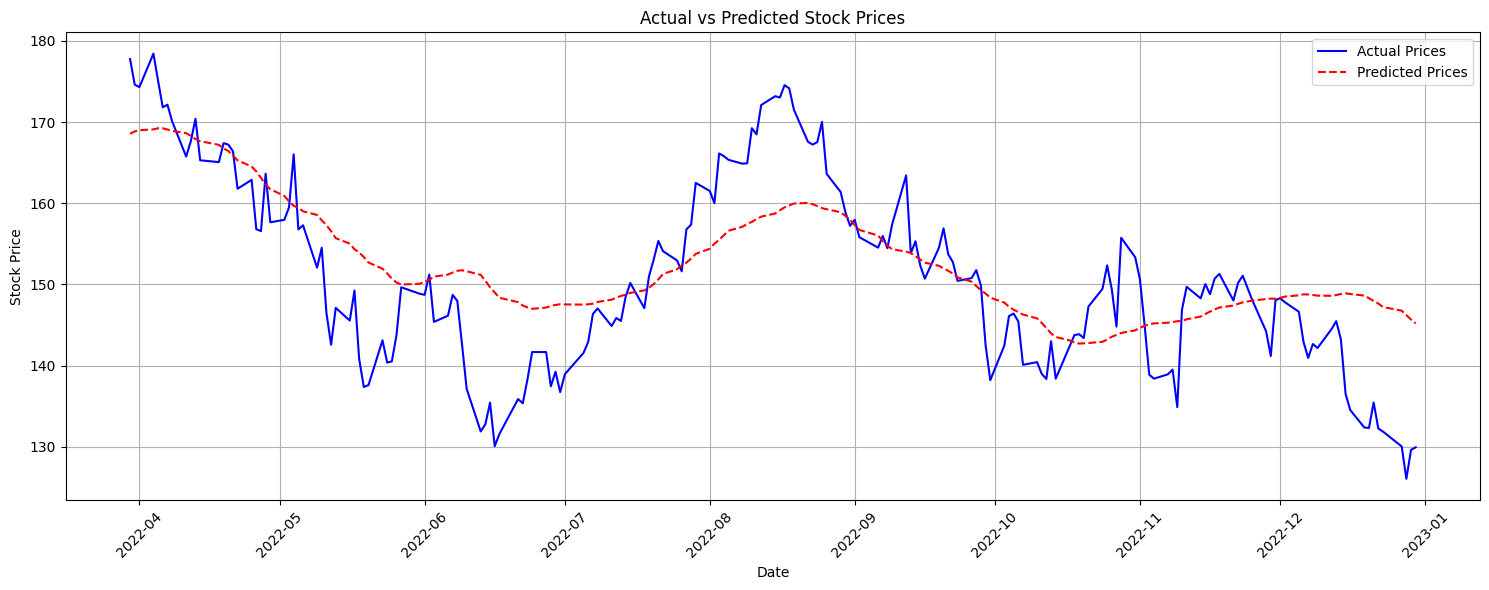

In [24]:
def plot_results(original_data, predictions, sequence_length):
    # Ensure original_data is a DataFrame and has the correct index
    if not isinstance(original_data, pd.DataFrame):
        raise ValueError("original_data must be a DataFrame.")

    # Generate dates for x-axis
    dates = original_data.index[sequence_length:]

    # Extract actual prices
    actual_prices = original_data.values[sequence_length:]

    # Ensure both actual and predicted prices are aligned
    min_length = min(len(actual_prices), len(predictions))
    dates = dates[:min_length]
    actual_prices = actual_prices[:min_length]
    predictions = predictions[:min_length]

    plt.figure(figsize=(15, 6))

    plt.plot(dates, actual_prices, label='Actual Prices', color='blue')
    plt.plot(dates, predictions, label='Predicted Prices', color='red', linestyle='--')

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

# Example usage with your specific company data and predictions
plot_results(data[[specific_company]], specific_company_predictions, sequence_length)


In [22]:
# 6. Calculate and print the accuracy using Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - data.iloc[sequence_length:].values))
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Absolute Error (MAE): 9.6780


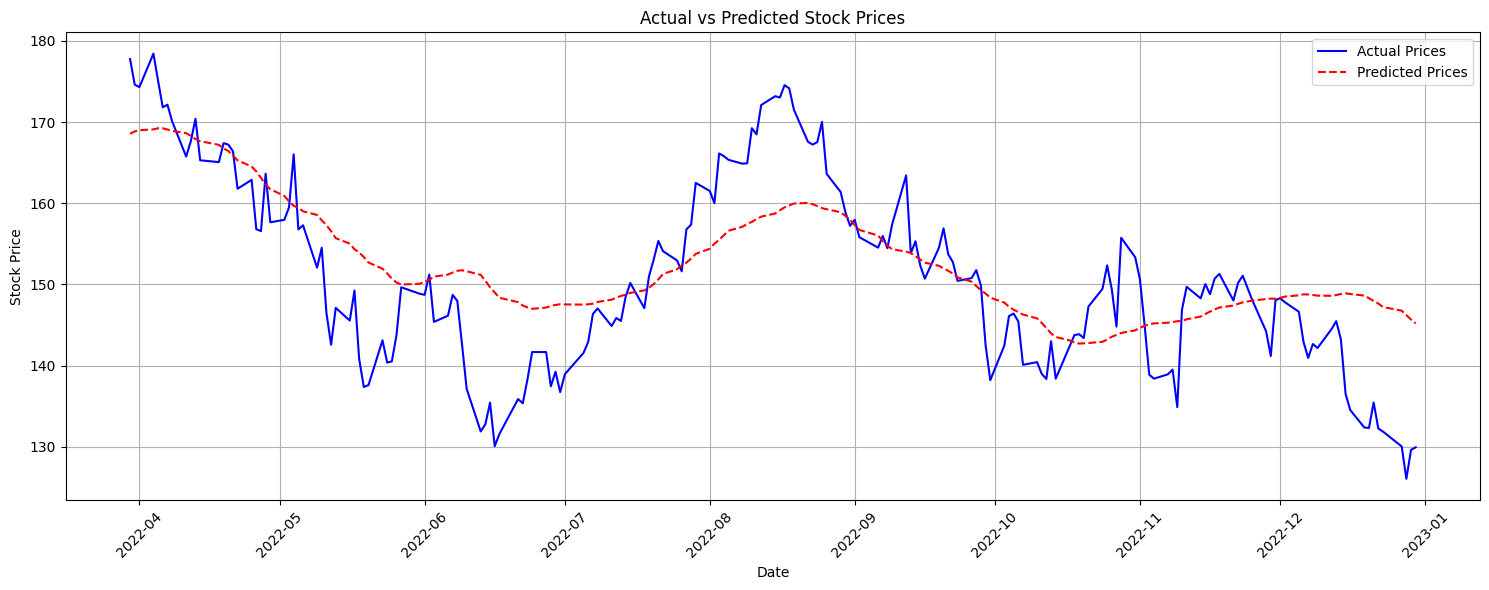

In [28]:
# Assume the model has been trained on all companies as before

# Company of interest
specific_company = 'AAPL'

# Get the index of the specific company in the dataset
company_index = companies.index(specific_company)

# Extract predictions for the specific company
specific_company_predictions = predictions[:, company_index]

# Plot results for the specific company
plot_results(data[[specific_company]], specific_company_predictions, sequence_length)


In [27]:
# Save the model to a file
model.save('stock_price_prediction_model.h5')
